** 스마트워치 센서 데이터 기반 행동 분류 3일차 **
# --------- 과제6 : 행동 추론 ---------

### [미션0] 과제 이해하기
   * 단말기 개발팀에서 새로 출시하는 Fine-Watch에 헬스케어 기능을 추가 할 수있도록, Fine-Watch에서 수집하는 데이터를 분석해 행동을 분류할 수 있는 AI 모델과 중요 feature list를 전달해야 합니다.
   * all 데이터셋에서 6가지 행동분류 중 'WALKING_UPSTAIRS'를 분류하는 모델을 만들고 정확도 도출해 보세요.
   * 마지막으로 누적된 모델의 정확도(result)와 'WALKING_UPSTAIRS' 행동분류에 중요하게 작용하는 Feature 5개를 개발팀으로 전달해 주세요.
   

※ 과제완수 조건: Fine-Watch에 헬스케어 기능 추가를 위해 'WALKING_UPSTAIRS' 행동을 분류할 수 있는 AI 모델을 만들고 모델의 정확도와 데이터를 시각화 하세요.

----------

### [미션1] 데이터 불러오기

* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러리가 없을땐 !pip 명령어를 통해 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 2일차에 생성한 파일들을 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 모델별 결과 불러오기 -> 중요 feature 불러오기 -> test_data 불러오기 -> train_data 불러오기 -> 데이터 합치기 -> 데이터 인덱스 초기화 하기 -> X, Y 데이터 나누기 -> 학습 데이터 나누기

In [28]:
# pandas, numpy, matplotlib, seaborn, os 등 필요 라이브러리 호출
# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
# 모델 성능 평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 사용
# XGBClassifier 알고리즘 사용을 위한 모듈 호출
# 진척도 상황을 확인하기 위한 tqdm 라이브러리 호출
# 저장한 모델 사용을 위한 joblib 라이브러리 호출
## 그외 라이브러리는 필요에 따라 호출해서 사용하세요.


import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from xgboost import XGBClassifier
import joblib
from tqdm import tqdm

In [2]:
# 모델별 결과 불러오기
## 모델별 정확도를 비교 할 수 있도록 결과 저장 파일을 불러 옵니다.
## 'data' 폴더에서 /result5.csv 파일을 불러와 result 변수에 할당 합니다.
path = './data/result5.csv'
result = pd.read_csv(path)
result

,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983569,0.985092
2,knn,train,0.954674,0.958345
3,gbc,train,0.981870,0.983141
4,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.992068,0.992707
6,hpt_xgb_150,train,0.990935,0.991688
7,hpt_xgb_50,train,0.984136,0.984224
8,hpt_xgb_top,train,0.993768,0.994236
9,test_hpt_xgb_top,test,0.986404,0.986820


In [3]:
# 중요 feature 불러오기
## 모델 정확도에 높은 영향을 미치는 feature 이름을 저장한 importance_top.pkl 파일을 불러와 importance_top에 저장 합니다.


import joblib 

importance_top = joblib.load('importance_top.pkl')
importance_top

0                   angle(X,gravityMean)
1                      tBodyAccMag-std()
2                  fBodyAcc-skewness()-X
3                      fBodyAccMag-std()
4              tGravityAcc-arCoeff()-Z,1
                     ...                
136          tBodyGyro-correlation()-X,Z
137    fBodyAccJerk-bandsEnergy()-9,16.1
138               tBodyGyroMag-entropy()
139                     tBodyAcc-std()-X
140                 tGravityAcc-mean()-Z
Name: feature_name, Length: 141, dtype: object

In [4]:
# test 데이터 불러오기
## 'data' 폴더에서 test_data.csv 파일을 불러와서 test_data 변수에 할당해 주세요.
path = './data/test_data.csv'
test_data = pd.read_csv(path)
test_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,22,SITTING
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,15,STANDING
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,22,WALKING
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,8,SITTING
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,0.278725,-0.015262,-0.106398,-0.993625,-0.982845,-0.974745,-0.993963,-0.981100,-0.974596,-0.939303,...,-0.874066,-0.054788,0.712975,0.300318,-0.319188,-0.857336,0.120184,0.119276,14,SITTING
1467,0.275803,-0.019257,-0.109078,-0.998614,-0.991621,-0.987403,-0.998813,-0.991503,-0.986802,-0.945442,...,-0.721050,0.076333,-0.021599,-0.277268,0.754011,-0.764185,0.212111,0.138595,16,STANDING
1468,0.240402,0.006361,-0.121377,-0.045805,0.189930,0.332664,-0.114706,0.157771,0.195271,0.210139,...,-0.615554,0.330378,-0.667635,0.806563,-0.850113,-0.639564,0.185363,0.260201,8,WALKING_DOWNSTAIRS
1469,0.135873,-0.020675,-0.116644,-0.960526,-0.955134,-0.985818,-0.963115,-0.971338,-0.988261,-0.946289,...,-0.422383,-0.048474,0.236761,-0.186581,0.396648,0.790877,-0.474618,-0.505953,19,LAYING


In [5]:
# train 데이터 불러오기
## 'data' 폴더에서 train_data.csv 파일을 불러와서 train_data 변수에 할당해 주세요.
path = './data/train_data.csv'
train_data = pd.read_csv(path)
train_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,21,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,15,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,19,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,6,WALKING_UPSTAIRS


In [6]:
# 데이터 합치기
## all_data 변수에 train 데이터셋과 test 데이터셋을 위/아래로 합쳐서 할당 합니다.
all_data = pd.concat([train_data, test_data], axis=0)
all_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,0.278725,-0.015262,-0.106398,-0.993625,-0.982845,-0.974745,-0.993963,-0.981100,-0.974596,-0.939303,...,-0.874066,-0.054788,0.712975,0.300318,-0.319188,-0.857336,0.120184,0.119276,14,SITTING
1467,0.275803,-0.019257,-0.109078,-0.998614,-0.991621,-0.987403,-0.998813,-0.991503,-0.986802,-0.945442,...,-0.721050,0.076333,-0.021599,-0.277268,0.754011,-0.764185,0.212111,0.138595,16,STANDING
1468,0.240402,0.006361,-0.121377,-0.045805,0.189930,0.332664,-0.114706,0.157771,0.195271,0.210139,...,-0.615554,0.330378,-0.667635,0.806563,-0.850113,-0.639564,0.185363,0.260201,8,WALKING_DOWNSTAIRS
1469,0.135873,-0.020675,-0.116644,-0.960526,-0.955134,-0.985818,-0.963115,-0.971338,-0.988261,-0.946289,...,-0.422383,-0.048474,0.236761,-0.186581,0.396648,0.790877,-0.474618,-0.505953,19,LAYING


In [7]:
# 데이터 인덱스 초기화
## 데이터셋을 위아래로 합치면 인덱스 중복이 발생 합니다.
## 인덱스가 중복되지 않도록 인덱스를 리셋해 주세요.
all_data.reset_index(inplace=True, drop=True)
all_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.278725,-0.015262,-0.106398,-0.993625,-0.982845,-0.974745,-0.993963,-0.981100,-0.974596,-0.939303,...,-0.874066,-0.054788,0.712975,0.300318,-0.319188,-0.857336,0.120184,0.119276,14,SITTING
7348,0.275803,-0.019257,-0.109078,-0.998614,-0.991621,-0.987403,-0.998813,-0.991503,-0.986802,-0.945442,...,-0.721050,0.076333,-0.021599,-0.277268,0.754011,-0.764185,0.212111,0.138595,16,STANDING
7349,0.240402,0.006361,-0.121377,-0.045805,0.189930,0.332664,-0.114706,0.157771,0.195271,0.210139,...,-0.615554,0.330378,-0.667635,0.806563,-0.850113,-0.639564,0.185363,0.260201,8,WALKING_DOWNSTAIRS
7350,0.135873,-0.020675,-0.116644,-0.960526,-0.955134,-0.985818,-0.963115,-0.971338,-0.988261,-0.946289,...,-0.422383,-0.048474,0.236761,-0.186581,0.396648,0.790877,-0.474618,-0.505953,19,LAYING


### [미션2] 'WALKING_UPSTAIRS' 행동분류에 영향을 미치는 중요 feature 도출


* 개발팀에서 'WALKING_UPSTAIRS' 행동분류 기능을 개발할 수 있도록 데이터에서 특히 'WALKING_UPSTAIRS' 행동분류에만 영향을 많이 미치는 중요 feature 를 찾아주세요.


	- 실습순서: X, Y 데이터 나누기-> 학습 데이터 나누기 -> AI 모델링 및 결과 예측 -> 모델 성능 평가 -> 예측 결과 저장


In [8]:
# X, Y 데이터 나누기
## 모델 학습을 위해 feature(X) 데이터와 target(Y) 데이터를 나누어 주어야 합니다.
## target(Y)을 분리를 위해 all_data['Activity'] 값을 숫자로 변환 할 때 'WALKING_UPSTAIRS' 만 인식 할 수 있도록 숫자를 구성해야 합니다.
## 변환된 결과를 all_y_map 변수에 할당 합니다. 
## all_data 데이터에서 2일차에서 선정한 중요도가 높은 feature 들만 골라 all_x 변수에 할당 합니다.
## 중요도가 높은 feature 들의 이름은 .pkl 파일에서 불러와 importance_top 변수에 저장되어 있습니다.

all_x = all_data[importance_top]
all_y = all_data['Activity'].map({'STANDING':0, 'SITTING':0, 'LAYING':0, 'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':0})

In [9]:
# 학습 데이터 나누기
## 학습에 필요한 all_x 와 all_y_map 데이터를 학습 7 : 검증 3 비율로 나누어 주세요.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 데이터를 할당받을 변수명: all_x_train, all_x_val, all_y_train, all_y_val

all_x_train, all_x_val, all_y_train, all_y_val = train_test_split(all_x, all_y, test_size=0.3, random_state=2023)


In [10]:
# AI 모델링 및 결과 예측
## XGBClassifier 알고리즘을 사용하여 walkingup_model 변수에 모델을 생성 및 초기화 합니다.
## 파라미터는 최종 조정 파라미터를 사용하고, random_state는 2023 으로 설정해 주세요.
## 모델이 생성되면 all_x_train, all_y_train 로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 all_x_val 데이터의 결과를 예측하여 walkingup_pred 변수에 할당 합니다.
walkingup_model = XGBClassifier(learning_rate = 0.3, max_depth = 2, random_state = 2023)
walkingup_model.fit(all_x_train, all_y_train)
walkingup_pred = walkingup_model.predict(all_x_val)
walkingup_pred

array([0, 0, 0, ..., 0, 1, 0])

In [11]:
# walkingup_model 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report
print('accuracy_score:', accuracy_score(all_y_val, walkingup_pred))
print()
print('confusion_matrix:\n', confusion_matrix(all_y_val, walkingup_pred))
print()
print('classification_report:\n', classification_report(all_y_val, walkingup_pred))

accuracy_score: 0.99909338168631

confusion_matrix:
 [[1885    1]
 [   1  319]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1886
           1       1.00      1.00      1.00       320

    accuracy                           1.00      2206
   macro avg       1.00      1.00      1.00      2206
weighted avg       1.00      1.00      1.00      2206



In [12]:
# walkingup_xgb_model 예측결과 저장
## result 데이터프레임 12번 인덱스에 'walkingup_xgb'(모델명), 'all'(검증 데이터명), accuracy_score 결과, f1_score 결과를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
result.loc[12,:] = ['walkingup_xgb', 'all', accuracy_score(all_y_val, walkingup_pred), f1_score(all_y_val, walkingup_pred, average='macro')]
result


,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983569,0.985092
2,knn,train,0.954674,0.958345
3,gbc,train,0.981870,0.983141
4,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.992068,0.992707
6,hpt_xgb_150,train,0.990935,0.991688
7,hpt_xgb_50,train,0.984136,0.984224
8,hpt_xgb_top,train,0.993768,0.994236
9,test_hpt_xgb_top,test,0.986404,0.986820


### [미션3] 'WORKING_UPSTAIRS' 행동분류 모델 개선
* feature selection 기법을 상용하여 'WORKING_UPSTAIRS' 행동분류 모델의 정확도를 개선해 주세요.

	- 실습순서: feature 명 데이터 파일 생성 -> 데이터 분할/가공 -> 최적의 Feature Selection 찾기 -> 상위 5개 feature 데이터 시각화 -> 센서별 중요도 시각화 

In [19]:
# feature 명 데이터 파일 생성
## up_importance_sort 데이터프레임 변수를 생성 및 초기화 합니다.
up_importance_sort = pd.DataFrame()



In [20]:
# feature 명 할당
## up_importance_sort['feature_name'] 열에 walkingup_model 학습에 사용한 all_x 데이터프레임의 모든 feature 명을 할당 합니다.
up_importance_sort['feature_name'] = all_x.columns
up_importance_sort

,feature_name
0,"angle(X,gravityMean)"
1,tBodyAccMag-std()
2,fBodyAcc-skewness()-X
3,fBodyAccMag-std()
4,"tGravityAcc-arCoeff()-Z,1"
...,...
136,"tBodyGyro-correlation()-X,Z"
137,"fBodyAccJerk-bandsEnergy()-9,16.1"
138,tBodyGyroMag-entropy()
139,tBodyAcc-std()-X


In [21]:
# feature importances 할당
## up_importance_sort['feature_importance'] 열에 walkingup_model 모델의 feature_importances 를 할당해 줍니다.
up_importance_sort['feature_importance'] = walkingup_model.feature_importances_
up_importance_sort


,feature_name,feature_importance
0,"angle(X,gravityMean)",0.000000
1,tBodyAccMag-std(),0.014347
2,fBodyAcc-skewness()-X,0.000000
3,fBodyAccMag-std(),0.000394
4,"tGravityAcc-arCoeff()-Z,1",0.022442
...,...,...
136,"tBodyGyro-correlation()-X,Z",0.002849
137,"fBodyAccJerk-bandsEnergy()-9,16.1",0.000000
138,tBodyGyroMag-entropy(),0.000000
139,tBodyAcc-std()-X,0.001194


In [22]:
# 중요도 순으로 인덱스 재 정렬
## up_importance_sort 데이터프레임을 up_importance_sort['feature_importance'] 순으로 내림차순 정열 합니다.
up_importance_sort = up_importance_sort.sort_values(by='feature_importance', ascending=False)
up_importance_sort



,feature_name,feature_importance
60,"tGravityAcc-arCoeff()-Z,2",0.288720
7,"fBodyAcc-bandsEnergy()-1,8.2",0.170908
84,tBodyAccJerkMag-iqr(),0.064558
27,"fBodyAcc-bandsEnergy()-1,8.1",0.055187
34,"tGravityAcc-arCoeff()-Y,1",0.046767
...,...,...
56,tBodyGyro-min()-Y,0.000000
55,fBodyGyro-mad()-Y,0.000000
54,"tBodyAccJerk-arCoeff()-X,1",0.000000
53,fBodyGyro-std()-X,0.000000


In [23]:
# 데이터 인덱스 초기화
## 인덱스가 순서대로 나열 되도록 인덱스를 리셋해 주세요.
up_importance_sort.reset_index(inplace=True, drop=True)
up_importance_sort

,feature_name,feature_importance
0,"tGravityAcc-arCoeff()-Z,2",0.288720
1,"fBodyAcc-bandsEnergy()-1,8.2",0.170908
2,tBodyAccJerkMag-iqr(),0.064558
3,"fBodyAcc-bandsEnergy()-1,8.1",0.055187
4,"tGravityAcc-arCoeff()-Y,1",0.046767
...,...,...
136,tBodyGyro-min()-Y,0.000000
137,fBodyGyro-mad()-Y,0.000000
138,"tBodyAccJerk-arCoeff()-X,1",0.000000
139,fBodyGyro-std()-X,0.000000


In [25]:
len(up_importance_sort)

141

In [29]:
# 최적의 Feature Selection 찾기
## acc 데이터 프레임을 생성 및 초기화 합니다.(컬럼 지정: columns=['accuracy_score'])
## 전체 feature는 561개에서 도출한 Top feature 개수를(예: 141개) 선별 했기에 feature를 1개 ~ Top feature 개수까지 모델링과 결과를 도출 합니다.
## for 문을 사용해 중요도 상위 feature 1개 모델링부터 Top feature 개수까지 순차적 모델링 실행 후 각 accuracy_score 결과를 acc 변수에 누적 합니다.
## [TIP] tqdm: tqdm은 반복문에서 현재 계산되고 있는 부분의 퍼센테이지를 시각적으로 나태내어 줍니다.
acc = pd.DataFrame(columns=['accuracy_score'])

for i in tqdm(range(len(up_importance_sort))):
    importance_n = up_importance_sort['feature_name'][:i+1]

    x_train_n = all_x_train[importance_n]
    x_val_n = all_x_val[importance_n]

    xgb_n_model = XGBClassifier(learning_rate=0.3, max_depth=2, random_state=2023)
    xgb_n_model.fit(x_train_n, all_y_train)
    xgb_n_pred = xgb_n_model.predict(x_val_n)
    
    acc.loc[i] = accuracy_score(all_y_val, xgb_n_pred)

acc

100%|██████████| 141/141 [00:25<00:00,  5.63it/s]


,accuracy_score
0,0.849955
1,0.943336
2,0.951496
3,0.968722
4,0.969175
...,...
136,0.999093
137,0.999093
138,0.999093
139,0.999093


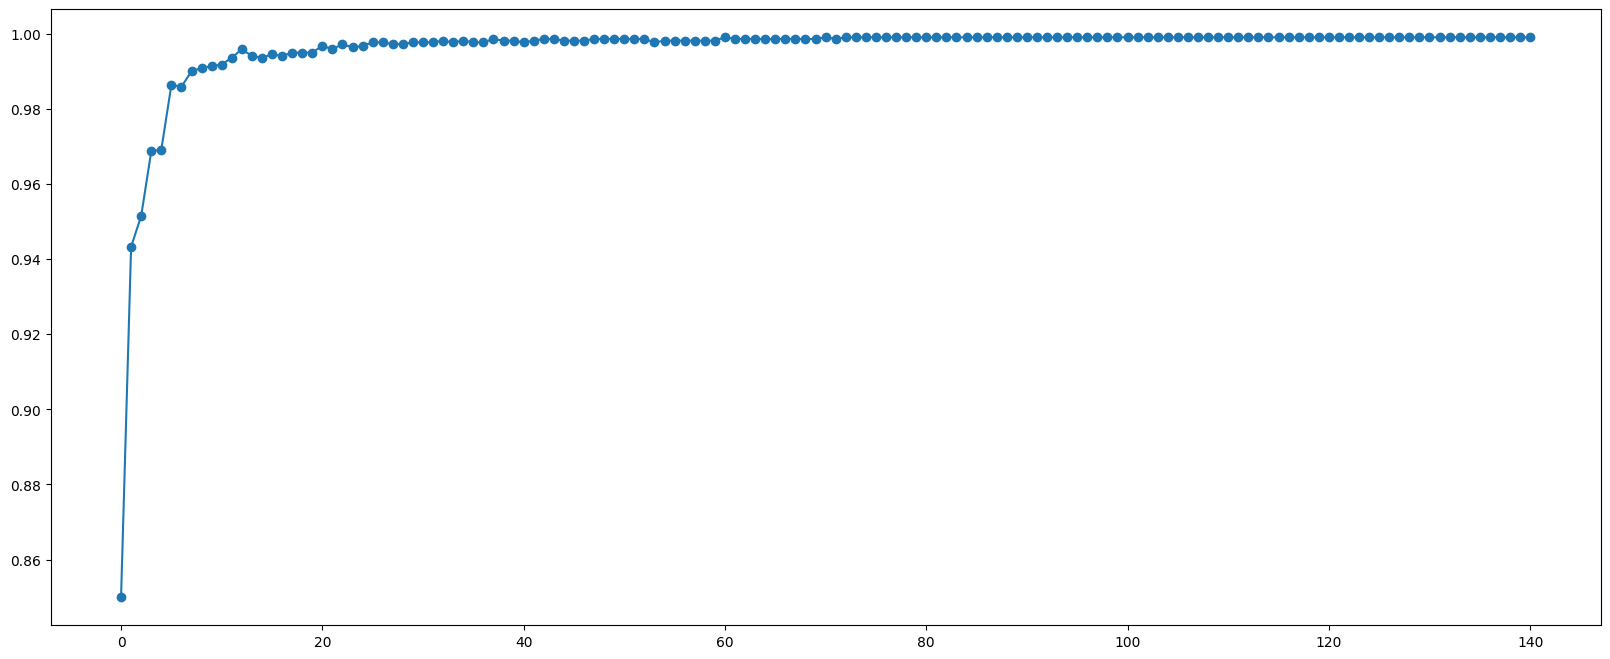

In [30]:
# accuracy_score 누적 결과 시각화
## accuracy_score 누적한 acc 변수를 plot으로 시각화 합니다.
plt.figure(figsize=(20,8))
plt.plot(acc, marker='o')
plt.show()

In [34]:
# 최고 정확도 Feature 개수 찾기
## acc 변수를 accuracy_score 기준 내림차순으로 정렬 합니다.(인덱스 재설정X)
## 인덱스 번호는 누적 학습된 feature의 개수 입니다.
## accuracy_score 값으로 내림차순 정렬 후 이 가장 첫번째 행의 인덱스 번호가 가장 정확도가 좋은 feature 개수를 뜻합니다.
acc = acc.sort_values(by='accuracy_score', ascending=False)
acc

,accuracy_score
70,0.999093
97,0.999093
91,0.999093
92,0.999093
93,0.999093
...,...
4,0.969175
3,0.968722
2,0.951496
1,0.943336


In [35]:
# 최고 정확도 Feature명 저장
## acc 결과에서 확인한 가장 성능좋은 결과를 내는 feature의 개수 만큼 importance_sort['feature_name']를 슬라이싱 하여 
## feature의 이름을 up_importance_top 변수에 할당 합니다.
up_importance_top = up_importance_sort['feature_name'][:acc.index[0] + 1]
up_importance_top

0           tGravityAcc-arCoeff()-Z,2
1        fBodyAcc-bandsEnergy()-1,8.2
2               tBodyAccJerkMag-iqr()
3        fBodyAcc-bandsEnergy()-1,8.1
4           tGravityAcc-arCoeff()-Y,1
                   ...               
66          tBodyGyroJerk-entropy()-X
67                   tBodyAcc-min()-Y
68              fBodyGyro-entropy()-X
69    fBodyGyro-bandsEnergy()-17,32.2
70                tGravityAcc-mad()-Y
Name: feature_name, Length: 71, dtype: object

In [36]:
# 훈련 데이터 생성
## all_x_train 데이터에서 위에서 up_importance_top에 할당한 feature 들의 데이터를 x_train_top 변수에 할당해 줍니다.
## all_x_val 데이터에서 위에서 up_importance_top에 할당한 feature 들의 데이터를 x_val_top 변수에 할당해 줍니다.
x_train_top = all_x_train[up_importance_top]
x_val_top = all_x_val[up_importance_top]

In [38]:
# AI 모델링 및 결과 예측
## XGBClassifier 알고리즘을 사용하여 walkingup_top_model 변수에 모델을 생성 및 초기화 합니다.
## 파라미터는 최종 조정 파라미터를 사용하고, random_state는 2023 으로 설정해 주세요.
## 모델이 생성되면 all_x_train_top, all_y_train 로 모델을 학습시켜 줍니다.
## 모델 학습이 완료되면 all_x_val_top 데이터의 결과를 예측하여 walkingup_pred 변수에 할당 합니다.
walkingup_top_model = XGBClassifier(learning_rate = 0.3, max_depth = 2, random_state = 2023)
walkingup_top_model.fit(x_train_top, all_y_train)
walkingup_pred = walkingup_top_model.predict(x_val_top)
walkingup_pred

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
# walkingup_top_model 성능 평가 하기
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report
print('accuracy_score:', accuracy_score(all_y_val, walkingup_pred))
print()
print('confusion_matrix:\n', confusion_matrix(all_y_val, walkingup_pred))
print()
print('classification_report:\n', classification_report(all_y_val, walkingup_pred))

accuracy_score: 0.99909338168631

confusion_matrix:
 [[1885    1]
 [   1  319]]

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1886
           1       1.00      1.00      1.00       320

    accuracy                           1.00      2206
   macro avg       1.00      1.00      1.00      2206
weighted avg       1.00      1.00      1.00      2206



In [40]:
# walkingup_top_model 예측결과 저장
## result 데이터프레임 13번 인덱스에 'walkingup_top'(모델명), 'all'(검증 데이터명), accuracy_score 결과, f1_score 결과 를 할당해 주세요.
## f1_score의 평균은 'macro' 파라미터를 사용 합니다.
result.loc[13,:] = ['walkingup_top', 'all', accuracy_score(all_y_val, walkingup_pred), f1_score(all_y_val, walkingup_pred, average='macro')]
result


,model_name,valid_data,accuracy_score,f1_score
0,svc,train,0.968839,0.971715
1,lr,train,0.983569,0.985092
2,knn,train,0.954674,0.958345
3,gbc,train,0.981870,0.983141
4,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.992068,0.992707
6,hpt_xgb_150,train,0.990935,0.991688
7,hpt_xgb_50,train,0.984136,0.984224
8,hpt_xgb_top,train,0.993768,0.994236
9,test_hpt_xgb_top,test,0.986404,0.986820


### [미션4] 'WORKING_UPSTAIRS' 분류에 영향을 미치는 'sensor' 찾기

* 'WORKING_UPSTAIRS' 분류에 가장 영향 많이 미치는 상위 20개의 sensor 그룹을 찾아 시각화 하세요

	- 실습순서: 그룹 데이터 불러오기 -> 데이터 프레임 merge 하기 -> 데이터 그룹화 ->  sensor 별 중요도 재정렬  -> sensor 별 중요도 시각화

In [41]:
# features.csv 파일 불러오기
## 'data'폴더에서 features.csv 파일을 읽어와 feature_group 변수에 할당 하세요.
path = './data/features.csv'
feature_group = pd.read_csv(path)
feature_group


,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z
3,tBodyAcc,std(),X,tBodyAcc-std()-X
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y
...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)"
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)"
558,angle,X,gravityMean,"angle(X,gravityMean)"
559,angle,Y,gravityMean,"angle(Y,gravityMean)"


In [42]:
# 데이터프레임 merge 
## merge_df 변수를 데이터프레임 타입으로 생성 및 초기화 합니다.
## feature_group 변수와 up_importance_sort 변수를 merge 하여 merge_df 할당 합니다.
merge_df = pd.DataFrame()
merge_df = pd.merge(feature_group, up_importance_sort)
merge_df

,sensor,agg,axis,feature_name,feature_importance
0,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.001511
1,tBodyAcc,std(),X,tBodyAcc-std()-X,0.001194
2,tBodyAcc,max(),X,tBodyAcc-max()-X,0.020553
3,tBodyAcc,min(),Y,tBodyAcc-min()-Y,0.000156
4,tBodyAcc,energy(),X,tBodyAcc-energy()-X,0.000000
...,...,...,...,...,...
134,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)",0.000000
135,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)",0.000000
136,angle,X,gravityMean,"angle(X,gravityMean)",0.000000
137,angle,Y,gravityMean,"angle(Y,gravityMean)",0.000894


In [43]:
# 데이터 그룹화
## merge_df 변수를 'sensor' 기준으로 그룹화 하고 'feature_importance' 열의 데이터를 같은 'sensor' 그룹끼리 더해 줍니다.
## groupby 함수는 데이터프레임을 그룹으로 묶으면서 필요한 계산을 동시에 수행할 수 있습니다.

sensor_sum = merge_df.groupby(by='sensor', as_index=False)[['feature_importance']].sum()
sensor_sum




,sensor,feature_importance
0,angle,0.007621
1,fBodyAcc,0.255681
2,fBodyAccJerk,0.060340
3,fBodyAccMag,0.000394
4,fBodyBodyAccJerkMag,0.005380
5,fBodyBodyGyroJerkMag,0.000000
6,fBodyBodyGyroMag,0.000000
7,fBodyGyro,0.037534
8,tBodyAcc,0.027861
9,tBodyAccJerk,0.018808


In [44]:
# sensor 중요도 재 정렬
## sensor_sum 데이터를 내림차순으로 정렬 후 sensor_sort 변수에 할당합니다.
## sensor_sum 을 데이터프레임 으로 생성했을 경우 기준(by=)을 지정해 주어야 합니다.
sensor_sort = sensor_sum.sort_values(by='feature_importance', ascending=False)
sensor_sort

,sensor,feature_importance
15,tGravityAcc,0.466397
1,fBodyAcc,0.255681
10,tBodyAccJerkMag,0.064558
2,fBodyAccJerk,0.060340
7,fBodyGyro,0.037534
12,tBodyGyro,0.029726
8,tBodyAcc,0.027861
9,tBodyAccJerk,0.018808
11,tBodyAccMag,0.018729
0,angle,0.007621


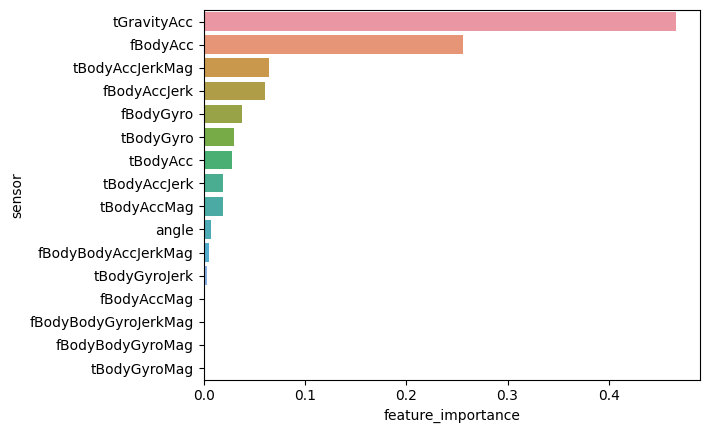

In [56]:
# 센서별 중요도 시각화
# sensor 별 중요도를 수평막대 그래프로 시각화 합니다.
sns.barplot(x = 'feature_importance', y = 'sensor', data = sensor_sort)
plt.show()

### [미션5] 최종결과 저장


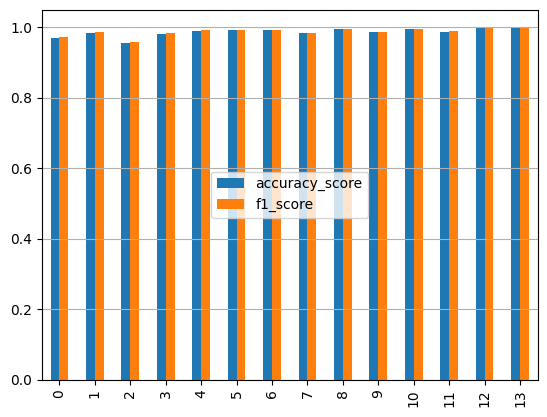

In [57]:
# 최종결과 결과 시각화
# 모델 별 accuracy_score, f1_score 지수를 수직 그래프로 시각화 하세요.
result.plot(kind='bar')
plt.legend(loc='center')
plt.grid(axis='y')
plt.show()

In [58]:
# 최종결과 저장
## 최종 결과(result)를 'final_result.csv' 파일로 저장해 주세요.
## 영향도가 높은 feature 들의 이름을 모아놓은 변수를 'up_importance_top.csv' 파일로 저장해 주세요.
result.to_csv('final_result.csv', index=False)
up_importance_top.to_csv('up_importance_top.csv', index=False)




----------
----------

### [도전미션1]  'WORKING_UPSTAIRS' 분류에 영향을 미치는 상위 20 agg 찾기

* 앞서 'WORKING_UPSTAIRS' 분류에 영향을 미치는 'sensor'를 찾아보았습니다.
* 도전미션1 에서는 'WORKING_UPSTAIRS' 분류에 가장 영향을 많이 미치는 'agg'(aggrigation) 을 찾아 보겠습니다.

	- 실습순서: 데이터 그룹화 -> 데이터 재정렬 -> Top20 agg 시각화

In [59]:
# 데이터 그룹화
## merge_df 변수를 ['sensor','agg'] 기준으로 그룹화 하면서 'feature_importance' 열의 데이터를 더해 줍니다.
## groupby 함수는 데이터프레임을 그룹으로 묶으면서 필요한 계산을 동시에 수행할 수 있습니다.
sensor_agg_sum = merge_df.groupby(by=['sensor', 'agg'], as_index=False)[['feature_importance']].sum()
sensor_agg_sum

,sensor,agg,feature_importance
0,angle,X,0.000000
1,angle,Y,0.000894
2,angle,Z,0.006727
3,angle,tBodyGyroJerkMean,0.000000
4,angle,tBodyGyroMean,0.000000
...,...,...,...
74,tGravityAcc,max(),0.001277
75,tGravityAcc,mean(),0.041425
76,tGravityAcc,min(),0.028370
77,tGravityAcc,sma(),0.000000


In [60]:
# sensor_agg 중요도 별 데이터 재정렬
## sensor_agg_sum 데이터를 내림차순으로 정렬 후 sensor_agg_sort 변수에 할당합니다.
sensor_agg_sort = sensor_agg_sum.sort_values(by='feature_importance', ascending=False)
sensor_agg_sort


,sensor,agg,feature_importance
70,tGravityAcc,arCoeff(),0.388192
5,fBodyAcc,bandsEnergy(),0.235422
47,tBodyAccJerkMag,iqr(),0.064558
12,fBodyAccJerk,maxInds,0.044229
75,tGravityAcc,mean(),0.041425
...,...,...,...
35,tBodyAcc,iqr(),0.000000
40,tBodyAccJerk,arCoeff(),0.000000
45,tBodyAccJerk,sma(),0.000000
46,tBodyAccJerkMag,energy(),0.000000


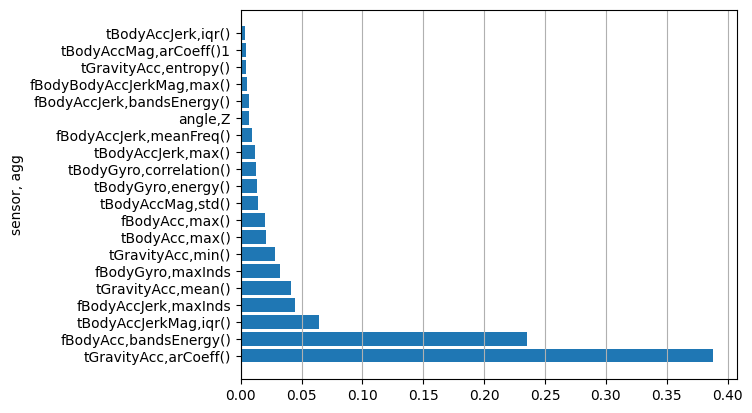

In [65]:
# 중요도 Top20 acc 시각화
## 중요도가 높은 센서 20개의 중요도를 수평 막대그래프로 시각화 합니다.
top20 = sensor_agg_sort[:20]
plt.barh((top20['sensor'] + ','+ top20['agg']), width=top20['feature_importance'])
plt.grid(axis='x')
plt.ylabel('sensor, agg')
plt.show()

----------
----------

### [도전미션2]  'sensor'를 구성하고있는 'agg' 시각화

* 'WORKING_UPSTAIRS' 분류에 영향을 미치는 'sensor'를 구성하고 있는 'agg'와 각 'sensor' 별 'agg'의 크기를 시각화 해보세요

	- 실습순서: 데이터 재구조화 -> sensor 별 합계 재정렬 -> 재정렬 기준열 제거 ->  누적 막대 그래프 시각화

In [66]:
# sensor_agg_sort 데이터 재 구조화
# sensor_agg_sort 데이터의 'agg'열의 고유값을 sensor_agg_sort 데이터의 컬럼으로 변환(재구조화) 합니다. 
# 재구조화 한 데이터를 acc 변수에 할당 합니다.
# 참고함수: unstack()
acc = sensor_agg_sort.pivot(index='sensor', columns='agg', values='feature_importance')
acc

agg,X,Y,Z,arCoeff(),arCoeff()1,arCoeff()3,bandsEnergy(),correlation(),energy(),entropy(),...,max(),maxInds,mean(),meanFreq(),min(),skewness(),sma(),std(),tBodyGyroJerkMean,tBodyGyroMean
sensor,,,,,,,,,,,,,,,,,,,,,
angle,0.0,0.000894,0.006727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
fBodyAcc,NaN,NaN,NaN,NaN,NaN,NaN,0.235422,NaN,NaN,NaN,...,0.020033,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
fBodyAccJerk,NaN,NaN,NaN,NaN,NaN,NaN,0.006707,NaN,NaN,NaN,...,0.000000,0.044229,NaN,0.009404,NaN,NaN,NaN,NaN,NaN,NaN
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000394,NaN,NaN
fBodyBodyAccJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fBodyBodyGyroJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
fBodyBodyGyroMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fBodyGyro,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000137,...,0.000207,0.031847,0.000000,0.001977,NaN,0.000786,NaN,0.000000,NaN,NaN
tBodyAcc,NaN,NaN,NaN,0.000251,NaN,NaN,NaN,0.00301,0.000000,0.001186,...,0.020553,NaN,0.001511,NaN,0.000156,NaN,NaN,0.001194,NaN,NaN


In [67]:
# 센서별 합계 재정렬
## acc 데이터의 각 센서의 행 기준(axis=1) 모든 값을 더해서 acc['sort'] 에 할당 합니다.
## 할당 후 acc 데이터를 acc['sort'] 열의 값 기준으로 내림차순으로 정렬 합니다.
acc['sort'] = acc.sum(axis=1)
acc = acc.sort_values(by='sort', ascending=False)
acc


agg,X,Y,Z,arCoeff(),arCoeff()1,arCoeff()3,bandsEnergy(),correlation(),energy(),entropy(),...,maxInds,mean(),meanFreq(),min(),skewness(),sma(),std(),tBodyGyroJerkMean,tBodyGyroMean,sort
sensor,,,,,,,,,,,,,,,,,,,,,
tGravityAcc,NaN,NaN,NaN,0.388192,NaN,NaN,NaN,NaN,0.002721,0.004281,...,NaN,0.041425,NaN,0.028370,NaN,0.0,0.000000,NaN,NaN,0.466397
fBodyAcc,NaN,NaN,NaN,NaN,NaN,NaN,0.235422,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.255681
tBodyAccJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.064558
fBodyAccJerk,NaN,NaN,NaN,NaN,NaN,NaN,0.006707,NaN,NaN,NaN,...,0.044229,NaN,0.009404,NaN,NaN,NaN,NaN,NaN,NaN,0.060340
fBodyGyro,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000137,...,0.031847,0.000000,0.001977,NaN,0.000786,NaN,0.000000,NaN,NaN,0.037534
tBodyGyro,NaN,NaN,NaN,0.001001,NaN,NaN,NaN,0.01247,0.013160,0.001138,...,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.029726
tBodyAcc,NaN,NaN,NaN,0.000251,NaN,NaN,NaN,0.00301,0.000000,0.001186,...,NaN,0.001511,NaN,0.000156,NaN,NaN,0.001194,NaN,NaN,0.027861
tBodyAccJerk,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.003126,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.018808
tBodyAccMag,NaN,NaN,NaN,NaN,0.004278,0.000105,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.014347,NaN,NaN,0.018729


In [68]:
# 정렬 기준열 제거
# 센서별 정렬을 완료 했으므로 acc 변수에서 acc['sort']열을 삭제 합니다.
acc.drop('sort', axis=1, inplace=True)
acc


agg,X,Y,Z,arCoeff(),arCoeff()1,arCoeff()3,bandsEnergy(),correlation(),energy(),entropy(),...,max(),maxInds,mean(),meanFreq(),min(),skewness(),sma(),std(),tBodyGyroJerkMean,tBodyGyroMean
sensor,,,,,,,,,,,,,,,,,,,,,
tGravityAcc,NaN,NaN,NaN,0.388192,NaN,NaN,NaN,NaN,0.002721,0.004281,...,0.001277,NaN,0.041425,NaN,0.028370,NaN,0.0,0.000000,NaN,NaN
fBodyAcc,NaN,NaN,NaN,NaN,NaN,NaN,0.235422,NaN,NaN,NaN,...,0.020033,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
tBodyAccJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
fBodyAccJerk,NaN,NaN,NaN,NaN,NaN,NaN,0.006707,NaN,NaN,NaN,...,0.000000,0.044229,NaN,0.009404,NaN,NaN,NaN,NaN,NaN,NaN
fBodyGyro,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000137,...,0.000207,0.031847,0.000000,0.001977,NaN,0.000786,NaN,0.000000,NaN,NaN
tBodyGyro,NaN,NaN,NaN,0.001001,NaN,NaN,NaN,0.01247,0.013160,0.001138,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
tBodyAcc,NaN,NaN,NaN,0.000251,NaN,NaN,NaN,0.00301,0.000000,0.001186,...,0.020553,NaN,0.001511,NaN,0.000156,NaN,NaN,0.001194,NaN,NaN
tBodyAccJerk,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.003126,...,0.011560,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
tBodyAccMag,NaN,NaN,NaN,NaN,0.004278,0.000105,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014347,NaN,NaN


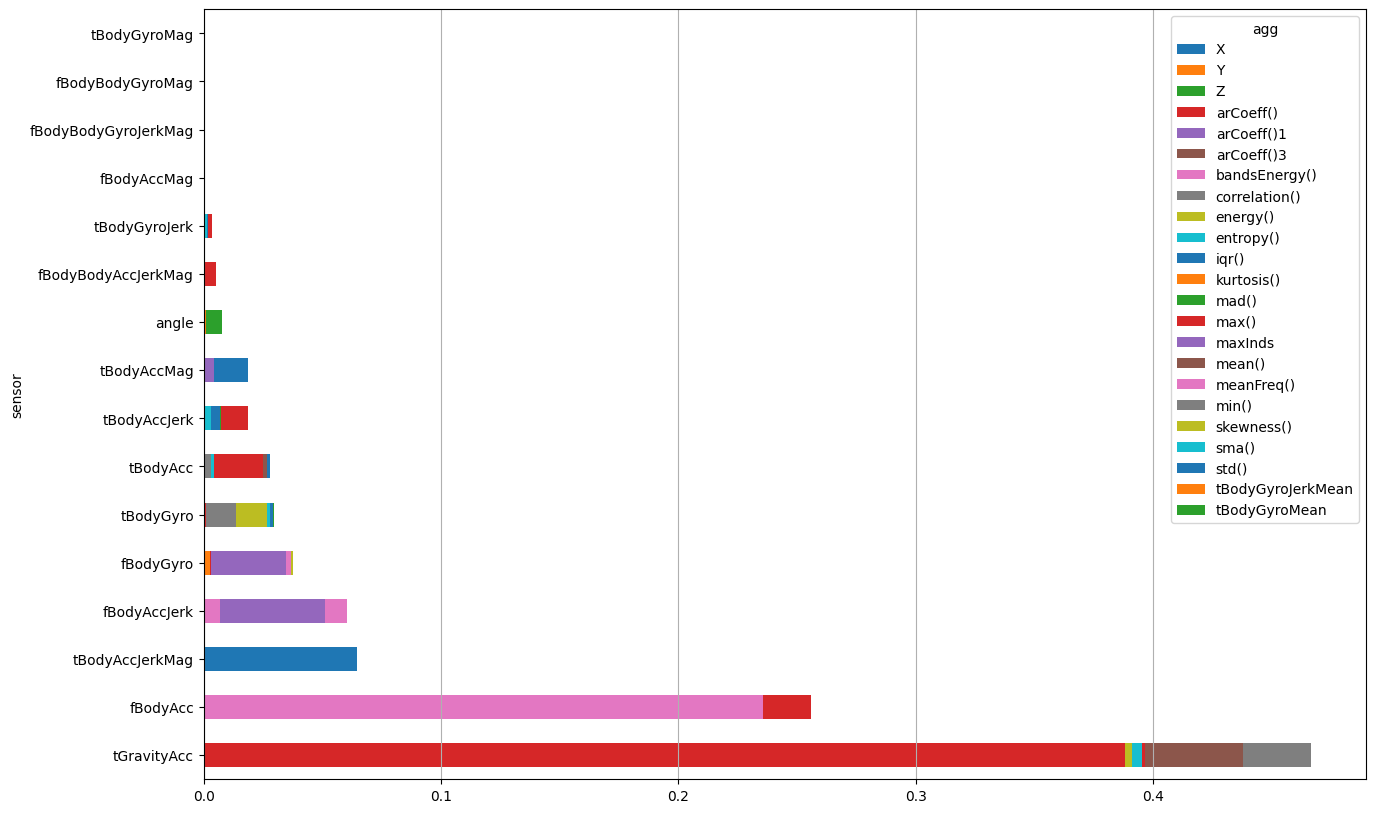

In [69]:
# 누적 막대 그래프 시각화
# acc 변수를 sensor 별 수평 그래프로 시각화 합니다.
acc.plot(kind='barh', stacked=True, figsize=(15, 10))
plt.grid(axis='x')
plt.show()


---
---

## <실전미션> Activity 예측하기


* 단말기 개발팀에서 최근에 Fine-Watch에서 수집한 real 데이터를 보내 주었습니다. 이 데이터에는 Activity 정보가 없습니다. 어느 'subject' 열이 'WALKING_UPSTAIRS' 데이터인지 Activity를 분류해서 결과를 단말기 개발팀 메일에 함께 보내 주세요.

In [71]:
## real_data.csv 파일을 불러와서 real_data 변수에 할당 합니다.
## 잘 할당 되었는지 데이터를 확인 합니다.
path = './data/real_data.csv'
real_data = pd.read_csv(path)
real_data


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.064073,-0.005123,-0.271555,-0.231952,0.593444,0.833666,-0.293844,0.603777,0.906303,-0.203098,...,-0.317461,-0.703020,0.075952,-0.648670,-0.838078,0.407393,-0.327642,0.312526,0.431085,1
1,-0.239103,-0.096904,0.148035,-0.637325,-0.127692,-0.258924,-0.643642,-0.138551,-0.239634,-0.878149,...,-0.157009,-0.561918,0.002418,-0.002366,-0.101878,0.543207,0.378792,-0.488443,-0.487057,2
2,-0.181394,0.324130,0.129390,-0.867258,-0.581496,-0.777242,-0.885160,-0.575035,-0.748065,-0.971348,...,-0.528134,-0.884218,0.106616,0.579102,0.082680,-0.075495,-0.638803,-0.024623,-0.208879,3
3,-0.166426,-0.119353,0.133035,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,...,0.196038,-0.128895,0.139475,0.039216,-0.495303,0.082696,0.272083,-0.534122,-0.397428,4
4,-0.161088,-0.028160,-0.209931,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,...,-0.609554,-0.864934,0.621322,-0.820087,0.351063,0.193917,-0.729349,0.208647,0.174249,5
5,-0.107530,0.013312,1.000000,-0.835146,-0.600036,-0.356636,-0.836418,-0.550924,-0.307091,-0.943929,...,-0.323623,-0.709580,0.142569,0.612084,-0.078512,0.002076,0.355207,-0.783544,0.169957,6
6,0.058595,-0.050059,-0.167108,-0.223698,0.110078,-0.094274,-0.248771,0.062721,-0.119843,-0.232788,...,-0.477556,-0.801206,0.368073,0.435915,-0.935362,-0.041572,-0.506027,0.364035,0.229471,7
7,0.062631,-0.062839,-0.334600,-0.170677,-0.365133,0.099516,-0.210948,-0.404148,0.103444,0.092464,...,0.207791,-0.149349,0.041817,0.121594,0.967539,-0.117698,-0.536821,0.207750,0.328708,8
8,0.069324,-0.007338,-0.161523,-0.090053,0.000301,0.243752,-0.232309,-0.026293,0.034870,0.321941,...,-0.132151,-0.476123,0.669298,0.037212,0.906914,0.502852,-0.827640,0.155705,0.127148,9
9,-0.466440,-0.618098,0.948795,-0.789764,-0.057348,-0.352774,-0.803030,0.063835,-0.302126,-0.953206,...,-0.399706,-0.728500,0.166498,0.611890,-0.002655,-0.018370,0.694861,-0.692058,-0.297937,10


In [72]:
## real_data 변수(데이터셋)에서 행동분류에 불필요한 'subject'열 제거한 데이터를 real_x_val 변수에 할당 합니다.
## 나중에 예측 결과를 real_data 데이터 프레임에 병합해서 결과를 확인해야 하므로 real_data 변수에서 'subject'열 제거하지 마세요.
real_x_val = real_data.drop('subject', axis=1)
real_x_val

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.064073,-0.005123,-0.271555,-0.231952,0.593444,0.833666,-0.293844,0.603777,0.906303,-0.203098,...,-0.046164,-0.317461,-0.703020,0.075952,-0.648670,-0.838078,0.407393,-0.327642,0.312526,0.431085
1,-0.239103,-0.096904,0.148035,-0.637325,-0.127692,-0.258924,-0.643642,-0.138551,-0.239634,-0.878149,...,-0.691219,-0.157009,-0.561918,0.002418,-0.002366,-0.101878,0.543207,0.378792,-0.488443,-0.487057
2,-0.181394,0.324130,0.129390,-0.867258,-0.581496,-0.777242,-0.885160,-0.575035,-0.748065,-0.971348,...,-0.206895,-0.528134,-0.884218,0.106616,0.579102,0.082680,-0.075495,-0.638803,-0.024623,-0.208879
3,-0.166426,-0.119353,0.133035,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,...,-0.800684,0.196038,-0.128895,0.139475,0.039216,-0.495303,0.082696,0.272083,-0.534122,-0.397428
4,-0.161088,-0.028160,-0.209931,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,...,0.458379,-0.609554,-0.864934,0.621322,-0.820087,0.351063,0.193917,-0.729349,0.208647,0.174249
5,-0.107530,0.013312,1.000000,-0.835146,-0.600036,-0.356636,-0.836418,-0.550924,-0.307091,-0.943929,...,-0.007533,-0.323623,-0.709580,0.142569,0.612084,-0.078512,0.002076,0.355207,-0.783544,0.169957
6,0.058595,-0.050059,-0.167108,-0.223698,0.110078,-0.094274,-0.248771,0.062721,-0.119843,-0.232788,...,0.486601,-0.477556,-0.801206,0.368073,0.435915,-0.935362,-0.041572,-0.506027,0.364035,0.229471
7,0.062631,-0.062839,-0.334600,-0.170677,-0.365133,0.099516,-0.210948,-0.404148,0.103444,0.092464,...,0.179968,0.207791,-0.149349,0.041817,0.121594,0.967539,-0.117698,-0.536821,0.207750,0.328708
8,0.069324,-0.007338,-0.161523,-0.090053,0.000301,0.243752,-0.232309,-0.026293,0.034870,0.321941,...,0.066485,-0.132151,-0.476123,0.669298,0.037212,0.906914,0.502852,-0.827640,0.155705,0.127148
9,-0.466440,-0.618098,0.948795,-0.789764,-0.057348,-0.352774,-0.803030,0.063835,-0.302126,-0.953206,...,0.008963,-0.399706,-0.728500,0.166498,0.611890,-0.002655,-0.018370,0.694861,-0.692058,-0.297937


In [73]:
## real_x_val 데이터에서 최고의 성능을 내는 학습 feature 데이터를 real_x_top 변수에 할당합니다.
## Feature Selection 된 상위 중요 feature 명 리스트는 up_importance_top 변수를 사용 합니다.
real_x_top = real_x_val[up_importance_top]
real_x_top

,"tGravityAcc-arCoeff()-Z,2","fBodyAcc-bandsEnergy()-1,8.2",tBodyAccJerkMag-iqr(),"fBodyAcc-bandsEnergy()-1,8.1","tGravityAcc-arCoeff()-Y,1",tGravityAcc-mean()-Y,fBodyAccJerk-maxInds-X,fBodyGyro-maxInds-Z,tGravityAcc-min()-Y,"tGravityAcc-arCoeff()-Y,3",...,tBodyGyro-energy()-Z,"tBodyAcc-arCoeff()-Z,1",fBodyAcc-max()-Z,fBodyAcc-kurtosis()-Y,fBodyGyro-max()-Y,tBodyGyroJerk-entropy()-X,tBodyAcc-min()-Y,fBodyGyro-entropy()-X,"fBodyGyro-bandsEnergy()-17,32.2",tGravityAcc-mad()-Y
0,0.647047,0.637163,-0.057804,0.511279,-0.455776,-0.320785,-0.44,-0.931034,-0.304474,-0.474454,...,0.015842,-0.212041,0.639537,-0.691956,0.704413,0.609499,-0.175775,0.589787,-0.724715,-0.948609
1,0.883813,-0.636955,-0.842448,-0.496576,-0.723882,0.702622,-0.32,-1.000000,0.633282,-0.707378,...,-0.923233,-0.392481,-0.012322,-0.329510,-0.713847,0.445686,0.094907,0.379448,-0.986322,-0.667815
2,0.880618,-0.964124,-0.945948,-0.869466,-0.893319,0.154022,0.00,-1.000000,0.050005,-0.878052,...,-0.928513,-0.052852,-0.700026,0.573952,-0.856023,-0.099062,0.754046,-0.197784,-0.994535,-0.385826
3,0.885410,-0.699417,-0.790722,-0.567425,-0.706948,0.755542,-0.68,-1.000000,0.742818,-0.718037,...,-0.910792,-0.401426,-0.232256,-0.628116,-0.812751,-0.046297,0.094907,0.279512,-0.986672,-0.971528
4,0.212832,-0.636607,0.505935,0.040267,-0.100434,-0.177071,-0.80,-0.655172,-0.177897,-0.200817,...,-0.275996,0.017347,-0.350431,-0.887666,-0.143850,0.556482,-0.292938,0.935103,-0.230474,-0.919809
5,0.979957,-0.718368,-0.957353,-0.880276,-0.810688,0.911067,-0.52,-1.000000,0.870227,-0.785201,...,-0.988971,-0.131509,-0.045299,0.598818,-0.782625,0.161646,0.556154,-0.078372,-0.999513,-0.791374
6,0.674879,-0.655319,-0.473576,-0.340986,-0.478802,-0.403427,-0.84,-0.931034,-0.387870,-0.571536,...,-0.549344,-0.404175,-0.149964,-0.696559,-0.639498,0.586999,-0.018863,0.550110,-0.877294,-0.931627
7,0.740446,-0.341864,-0.481433,-0.760381,-0.577137,-0.182495,-0.84,-0.931034,-0.175276,-0.551401,...,-0.732904,-0.798370,0.235402,-0.642319,-0.560662,0.703261,0.305556,0.402691,-0.944189,-0.877573
8,0.417693,-0.452661,-0.152046,-0.538001,-0.237391,-0.103324,-0.60,-0.931034,-0.090482,-0.206321,...,-0.733334,-0.183240,-0.295177,-0.742960,-0.501676,0.541915,-0.070301,0.691373,-0.821971,-0.955126
9,0.939881,-0.731737,-0.909669,-0.359878,-0.810482,0.833936,-0.48,-1.000000,0.483086,-0.784030,...,-0.969974,0.045785,-0.240154,0.603371,-0.887819,0.321538,-0.037163,0.054967,-0.992258,-0.214318


In [74]:
## walkingup_top 모델로 real_x_top 데이터의 'WALKING_UPSTAIRS' 행동분류 예측해서 real_walkingup_pred 변수에 할당 합니다.
real_walkingup_pred = walkingup_top_model.predict(real_x_top)
real_walkingup_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [75]:
## real_data['WALKING_UPSTAIRS'] 열에 real_walkingup_pred 예측 결과를 할당 하고, 데이터를 확인 합니다.
real_data['WALKING_UPSTAIRS'] = real_walkingup_pred
real_data


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,WALKING_UPSTAIRS
0,0.064073,-0.005123,-0.271555,-0.231952,0.593444,0.833666,-0.293844,0.603777,0.906303,-0.203098,...,-0.703020,0.075952,-0.648670,-0.838078,0.407393,-0.327642,0.312526,0.431085,1,1
1,-0.239103,-0.096904,0.148035,-0.637325,-0.127692,-0.258924,-0.643642,-0.138551,-0.239634,-0.878149,...,-0.561918,0.002418,-0.002366,-0.101878,0.543207,0.378792,-0.488443,-0.487057,2,0
2,-0.181394,0.324130,0.129390,-0.867258,-0.581496,-0.777242,-0.885160,-0.575035,-0.748065,-0.971348,...,-0.884218,0.106616,0.579102,0.082680,-0.075495,-0.638803,-0.024623,-0.208879,3,0
3,-0.166426,-0.119353,0.133035,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,...,-0.128895,0.139475,0.039216,-0.495303,0.082696,0.272083,-0.534122,-0.397428,4,0
4,-0.161088,-0.028160,-0.209931,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,...,-0.864934,0.621322,-0.820087,0.351063,0.193917,-0.729349,0.208647,0.174249,5,0
5,-0.107530,0.013312,1.000000,-0.835146,-0.600036,-0.356636,-0.836418,-0.550924,-0.307091,-0.943929,...,-0.709580,0.142569,0.612084,-0.078512,0.002076,0.355207,-0.783544,0.169957,6,0
6,0.058595,-0.050059,-0.167108,-0.223698,0.110078,-0.094274,-0.248771,0.062721,-0.119843,-0.232788,...,-0.801206,0.368073,0.435915,-0.935362,-0.041572,-0.506027,0.364035,0.229471,7,1
7,0.062631,-0.062839,-0.334600,-0.170677,-0.365133,0.099516,-0.210948,-0.404148,0.103444,0.092464,...,-0.149349,0.041817,0.121594,0.967539,-0.117698,-0.536821,0.207750,0.328708,8,1
8,0.069324,-0.007338,-0.161523,-0.090053,0.000301,0.243752,-0.232309,-0.026293,0.034870,0.321941,...,-0.476123,0.669298,0.037212,0.906914,0.502852,-0.827640,0.155705,0.127148,9,0
9,-0.466440,-0.618098,0.948795,-0.789764,-0.057348,-0.352774,-0.803030,0.063835,-0.302126,-0.953206,...,-0.728500,0.166498,0.611890,-0.002655,-0.018370,0.694861,-0.692058,-0.297937,10,0


In [76]:
## 인덱스 미포함 real_data 변수를 real_result.csv 파일로 저장 합니다.
real_data.to_csv('real_result.csv', index=False)



In [77]:
## 잘 저장 되었는지 확인 합니다.
check = pd.read_csv('real_result.csv')
check

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,WALKING_UPSTAIRS
0,0.064073,-0.005123,-0.271555,-0.231952,0.593444,0.833666,-0.293844,0.603777,0.906303,-0.203098,...,-0.703020,0.075952,-0.648670,-0.838078,0.407393,-0.327642,0.312526,0.431085,1,1
1,-0.239103,-0.096904,0.148035,-0.637325,-0.127692,-0.258924,-0.643642,-0.138551,-0.239634,-0.878149,...,-0.561918,0.002418,-0.002366,-0.101878,0.543207,0.378792,-0.488443,-0.487057,2,0
2,-0.181394,0.324130,0.129390,-0.867258,-0.581496,-0.777242,-0.885160,-0.575035,-0.748065,-0.971348,...,-0.884218,0.106616,0.579102,0.082680,-0.075495,-0.638803,-0.024623,-0.208879,3,0
3,-0.166426,-0.119353,0.133035,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,...,-0.128895,0.139475,0.039216,-0.495303,0.082696,0.272083,-0.534122,-0.397428,4,0
4,-0.161088,-0.028160,-0.209931,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,...,-0.864934,0.621322,-0.820087,0.351063,0.193917,-0.729349,0.208647,0.174249,5,0
5,-0.107530,0.013312,1.000000,-0.835146,-0.600036,-0.356636,-0.836418,-0.550924,-0.307091,-0.943929,...,-0.709580,0.142569,0.612084,-0.078512,0.002076,0.355207,-0.783544,0.169957,6,0
6,0.058595,-0.050059,-0.167108,-0.223698,0.110078,-0.094274,-0.248771,0.062721,-0.119843,-0.232788,...,-0.801206,0.368073,0.435915,-0.935362,-0.041572,-0.506027,0.364035,0.229471,7,1
7,0.062631,-0.062839,-0.334600,-0.170677,-0.365133,0.099516,-0.210948,-0.404148,0.103444,0.092464,...,-0.149349,0.041817,0.121594,0.967539,-0.117698,-0.536821,0.207750,0.328708,8,1
8,0.069324,-0.007338,-0.161523,-0.090053,0.000301,0.243752,-0.232309,-0.026293,0.034870,0.321941,...,-0.476123,0.669298,0.037212,0.906914,0.502852,-0.827640,0.155705,0.127148,9,0
9,-0.466440,-0.618098,0.948795,-0.789764,-0.057348,-0.352774,-0.803030,0.063835,-0.302126,-0.953206,...,-0.728500,0.166498,0.611890,-0.002655,-0.018370,0.694861,-0.692058,-0.297937,10,0


---
---

### [파이널 미션] 결과 메일 발송

* 수신자: aivleschool.dx@gmail.com

----------

# 수고하셨습니다

----------